In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import scipy.stats as stats
from sklearn.random_projection import GaussianRandomProjection

import itertools



In [2]:
import warnings
warnings.filterwarnings("ignore")

import os 
os.environ['OMP_NUM_THREADS'] = '7'

### Spotify Dataset

In [3]:
# Normalize the data
# scaler = StandardScaler()
# normalized_features = scaler.fit_transform(features)

# # Split into training and test sets
# X_train, X_test = train_test_split(normalized_features, test_size=0.2, random_state=30)

##### Spotify Dimension Reduction using PCA


In [4]:
# Load dataset
spotify_data = pd.read_csv('Input_data/cleaned_spotify_data.csv')


In [5]:
selected_features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 
            'instrumentalness_%', 'liveness_%', 'speechiness_%', 'in_spotify_playlists', 
            'in_deezer_playlists', 'in_apple_playlists','artist_count', 'released_year']

In [6]:
#Extract selected features
spotify_selected_df = spotify_data[selected_features]

In [7]:
# Standardize the data
scaler = StandardScaler()
spotify_selected_scaled = scaler.fit_transform(spotify_selected_df)

spotify_train, spotify_test = train_test_split(spotify_selected_scaled, test_size=0.2, random_state=30)


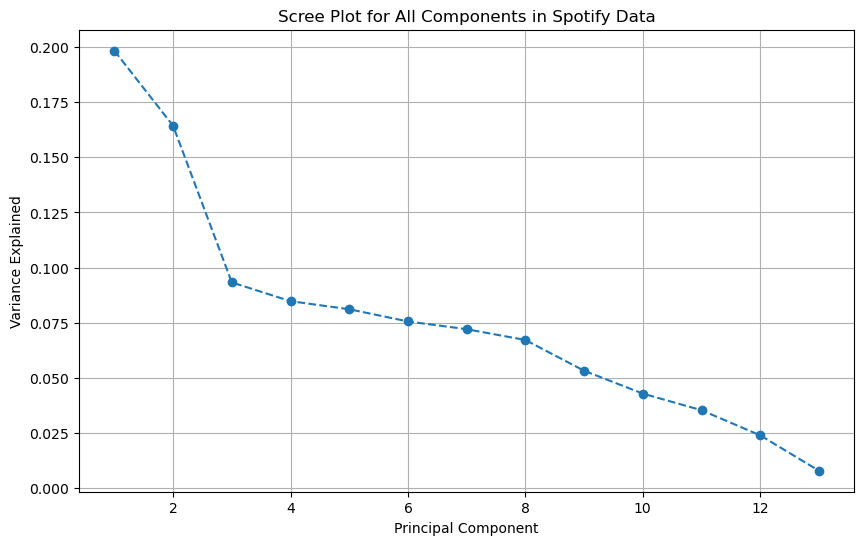

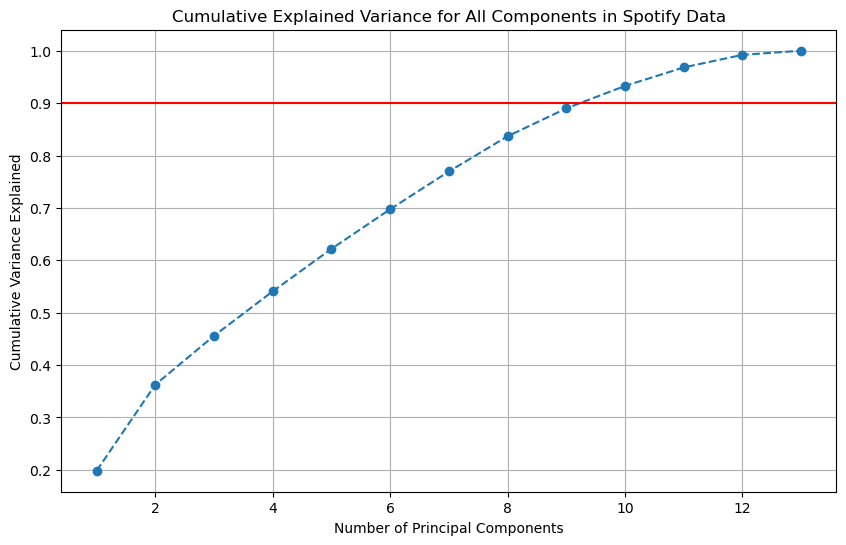

In [8]:
# Apply PCA
pca_selected = PCA()
spotify_pca_selected_transformed = pca_selected.fit_transform(spotify_train)

# Explained variance ratio
explained_variance_selected = pca_selected.explained_variance_
explained_variance_selected = pca_selected.explained_variance_ratio_

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_selected) + 1), explained_variance_selected, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot for All Components in Spotify Data')
plt.grid()
plt.show()

# Cumulative Explained Variance
cumulative_variance_selected = np.cumsum(explained_variance_selected)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_selected) + 1), cumulative_variance_selected, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Explained Variance for All Components in Spotify Data')
plt.grid()
plt.axhline(y=0.90, color='r', linestyle='-')
plt.show()

In [9]:
# # Scree Plot
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, len(explained_variance_selected) + 1), explained_variance_selected, marker='o', linestyle='--')
# plt.xlabel('Principal Component')
# plt.ylabel('Variance Explained')
# plt.title('Scree Plot (Selected Features)')
# plt.grid()
# plt.show()

In [10]:
# # Create a biplot function
# def biplot(score, coeff, labels=None):
#     plt.figure(figsize=(10, 7))
#     plt.scatter(score[:, 0], score[:, 1], alpha=0.5)
#     for i in range(coeff.shape[0]):
#         plt.arrow(0, 0, coeff[i, 0]*2, coeff[i, 1]*2, color='r', alpha=0.5)
#         if labels is None:
#             plt.text(coeff[i, 0]*2.5, coeff[i, 1]*2.5, "Var" + str(i+1), color='g', ha='center', va='center')
#         else:
#             plt.text(coeff[i, 0]*2.5, coeff[i, 1]*2.5, labels[i], color='g', ha='center', va='center')
#     plt.xlabel("PC1")
#     plt.ylabel("PC2")
#     plt.title("PCA Biplot")
#     plt.grid()

# # Call the biplot function
# biplot(spotify_pca_selected_transformed, np.transpose(pca_selected.components_[:2, :]), labels=spotify_selected_df.columns)


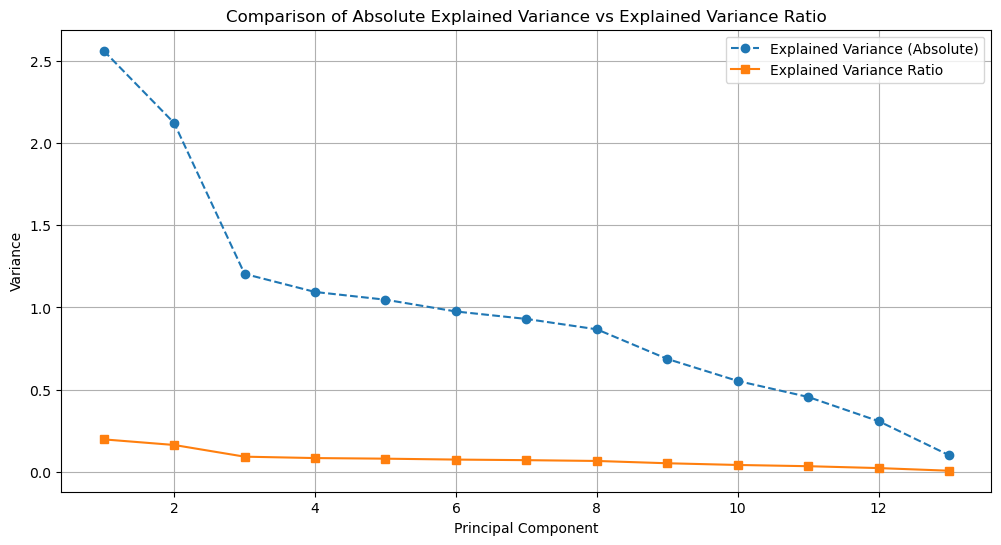

In [11]:
# Extract explained variance (absolute) and explained variance ratio (proportion)
explained_variance_abs = pca_selected.explained_variance_
explained_variance_ratio = pca_selected.explained_variance_ratio_

# Create a comparison plot
plt.figure(figsize=(12, 6))

# Plot absolute explained variance
plt.plot(range(1, len(explained_variance_abs) + 1), explained_variance_abs, marker='o', linestyle='--', label='Explained Variance (Absolute)')

# Plot explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='s', linestyle='-', label='Explained Variance Ratio')

plt.xlabel('Principal Component')
plt.ylabel('Variance')
plt.title('Comparison of Absolute Explained Variance vs Explained Variance Ratio')
plt.legend()
plt.grid()
plt.show()


In [12]:
# # visualize the principal components
# plt.scatter(spotify_pca_selected_transformed[:, 0], spotify_pca_selected_transformed[:, 1])
# plt.xlabel('PC 1')
# plt.ylabel('PC 2')
# plt.title('Scatter Plot of Principal Components')
# plt.grid()

# plt.show()


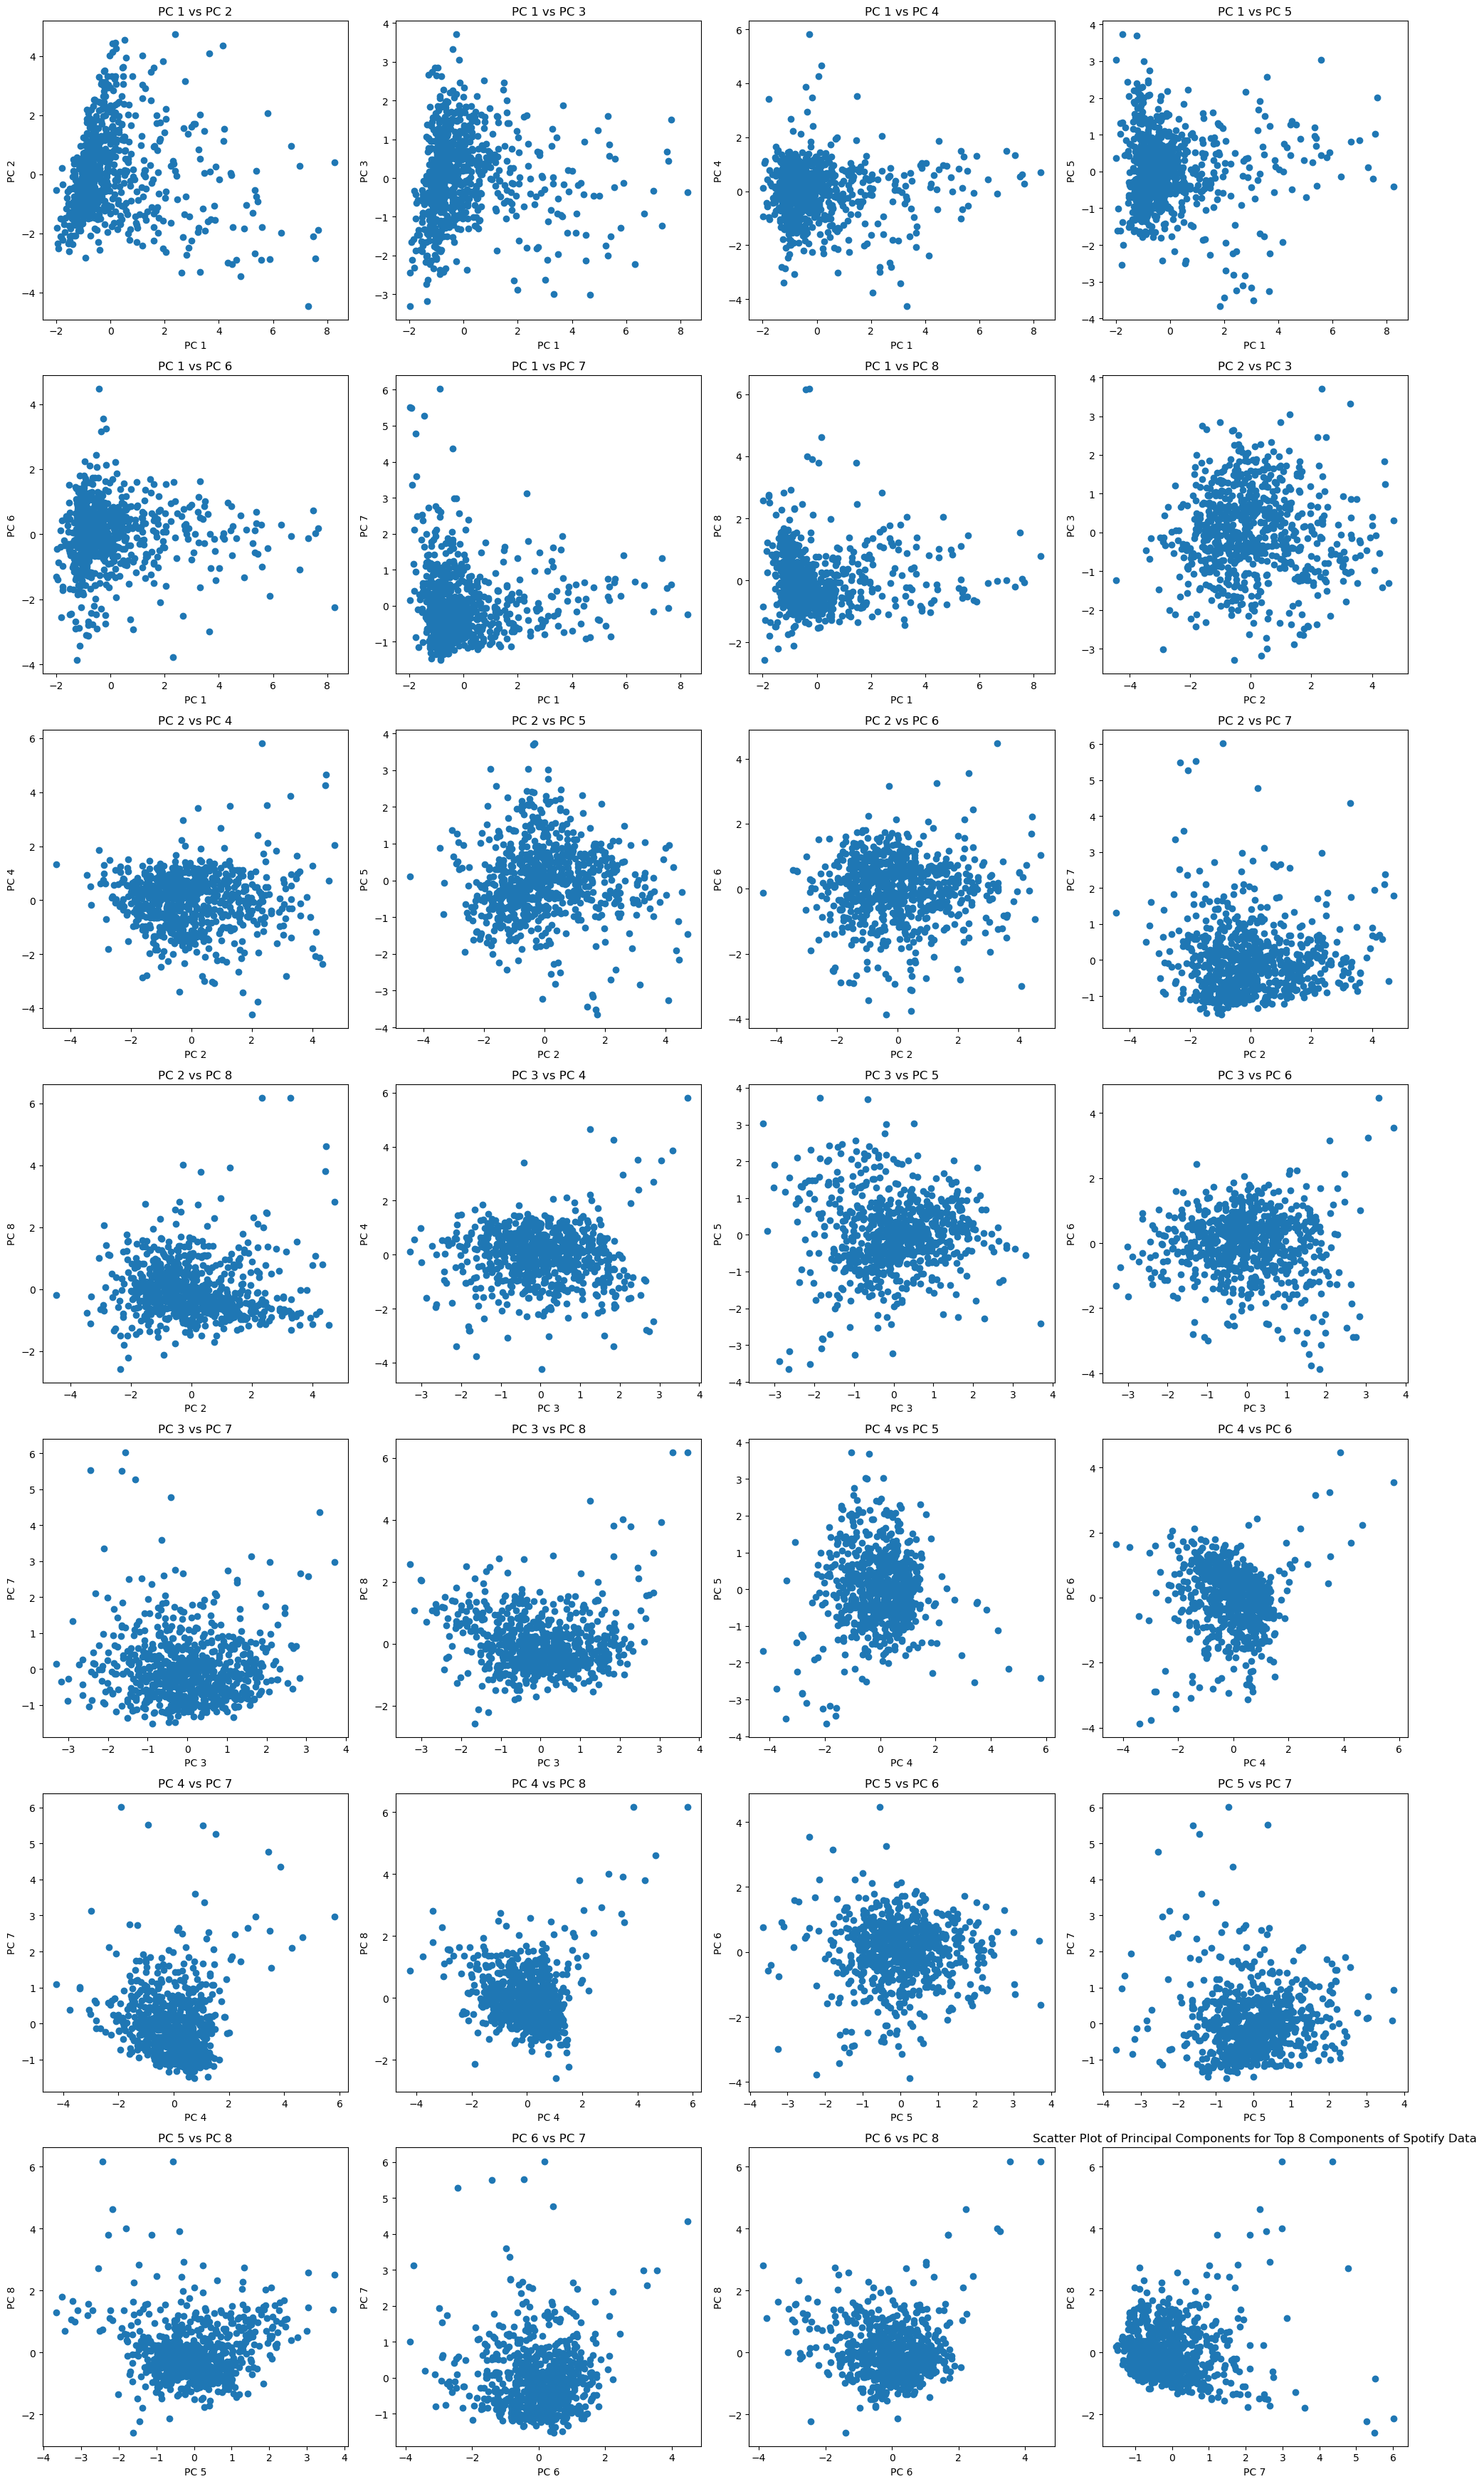

In [13]:
# visualize the principal components

rows = 7
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))

# Flatten axes for easy iteration (handles both 1D and 2D cases)
axes = np.array(axes).flatten()
index = 0

### We are cutting off the PCA components to 8 to avoid cluttering the plot

for i in range(0, 8):
    for j  in range(i+1, 8):
        ax = axes[index]
        ax.scatter(spotify_pca_selected_transformed[:, i], spotify_pca_selected_transformed[:, j])
        ax.set_xlabel('PC '+str(i+1))
        ax.set_ylabel('PC '+str(j+1))
        ax.set_title(f'PC {i+1} vs PC {j+1}')

        index += 1
    
plt.tight_layout()
plt.title('Scatter Plot of Principal Components for Top 8 Components of Spotify Data') 
plt.show()

# # plt.scatter(spotify_pca_selected_transformed[:, 0], spotify_pca_selected_transformed[:, 1])
# # plt.xlabel('PC 1')
# # plt.ylabel('PC 2')
# plt.title('Scatter Plot of Principal Components')
# # plt.grid()

# plt.show()


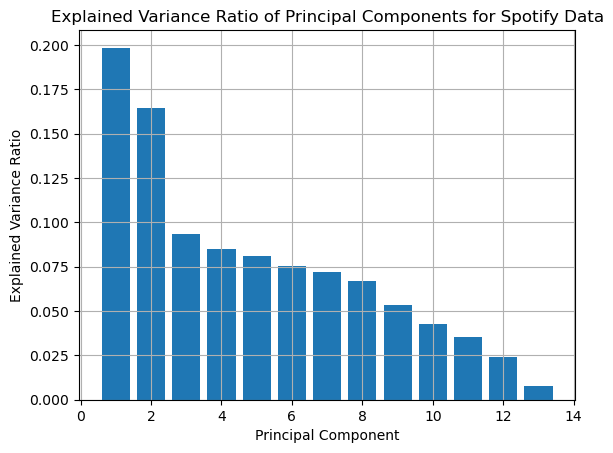

In [14]:
#PLot the explained variance ratio
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components for Spotify Data')
plt.grid()
plt.show()

*Findings*

Essentially we see that PC1 and PC2 carry the most weight so the variables that make up those components carry the most weight as well.




In [15]:
#create a dataframe for feature contributions
feature_contributions_selected_df  = pd.DataFrame(pca_selected.components_, columns=selected_features)


In [16]:

# Compute the absolute contributions of each feature to the first three principal components
top_features_pc1_selected = feature_contributions_selected_df.iloc[0].abs().sort_values(ascending=False)
top_features_pc2_selected = feature_contributions_selected_df.iloc[1].abs().sort_values(ascending=False)
top_features_pc3_selected = feature_contributions_selected_df.iloc[2].abs().sort_values(ascending=False)
top_features_pc4_selected = feature_contributions_selected_df.iloc[3].abs().sort_values(ascending=False)


In [17]:
print(top_features_pc1_selected)
print(top_features_pc2_selected)
print(top_features_pc3_selected)
print(top_features_pc4_selected)

in_spotify_playlists    0.573660
in_deezer_playlists     0.501092
in_apple_playlists      0.454598
released_year           0.348331
danceability_%          0.184218
speechiness_%           0.146575
artist_count            0.130407
energy_%                0.087967
valence_%               0.085087
acousticness_%          0.051828
liveness_%              0.040767
bpm                     0.008340
instrumentalness_%      0.002213
Name: 0, dtype: float64
energy_%                0.523695
acousticness_%          0.457714
valence_%               0.407485
danceability_%          0.399559
artist_count            0.224193
in_apple_playlists      0.189614
instrumentalness_%      0.171732
in_spotify_playlists    0.157882
in_deezer_playlists     0.153429
speechiness_%           0.113503
liveness_%              0.086144
released_year           0.076640
bpm                     0.014078
Name: 1, dtype: float64
speechiness_%           0.439368
acousticness_%          0.421595
danceability_%          0.37

##### Reduce the number of Features for SPotify




In [18]:
# Define a stricter threshold for low contribution
low_contribution_threshold = 0.30  

# Identify features with consistently low contributions across the first 4 PCs
low_contributing_features = feature_contributions_selected_df.iloc[:4].abs().max().sort_values()
features_to_remove = low_contributing_features[low_contributing_features < low_contribution_threshold]

# List of features to retain
features_to_keep = [feature for feature in selected_features if feature not in features_to_remove.index]


In [19]:
print(features_to_remove)

print('features to keep:' + str(features_to_keep))


artist_count    0.22849
dtype: float64
features to keep:['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists', 'released_year']


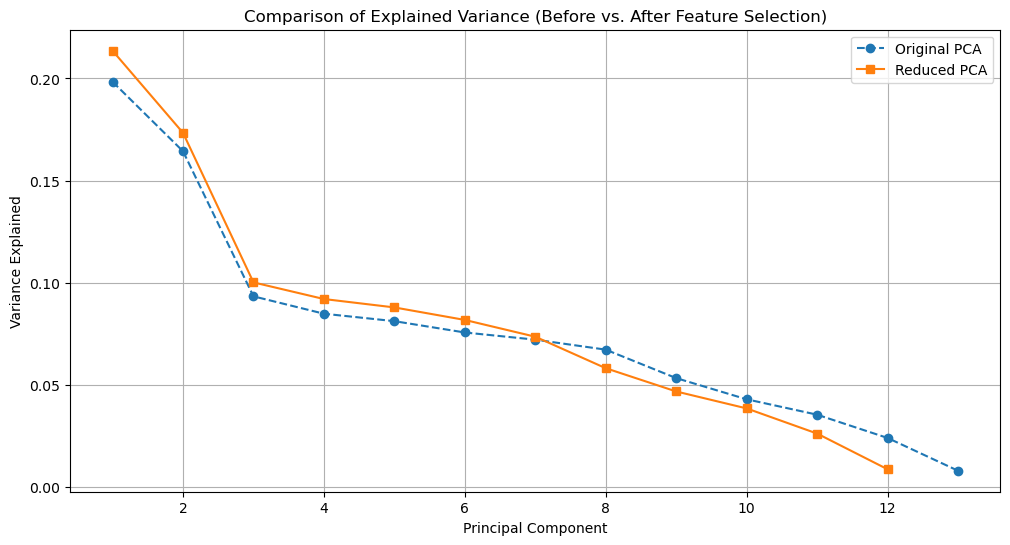

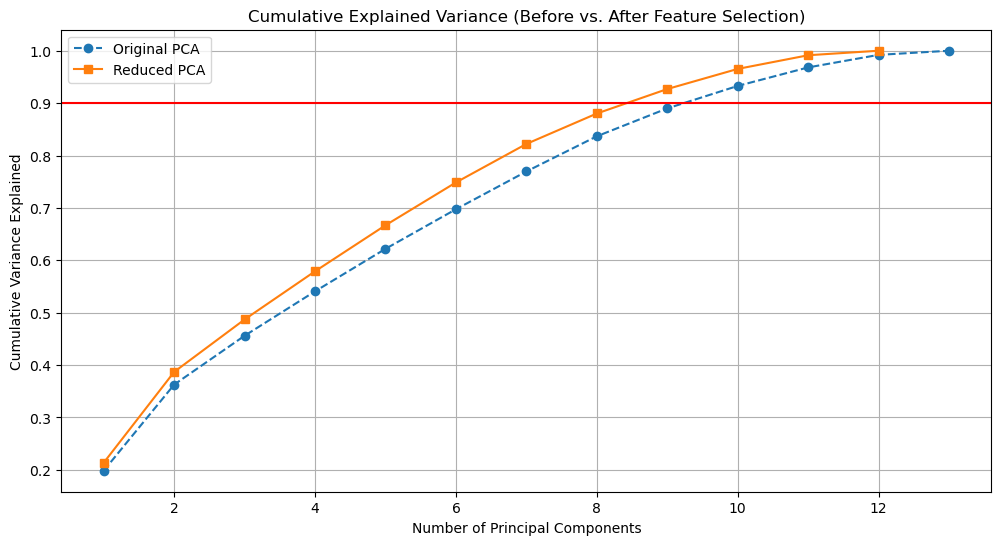

In [20]:
# Extract only the retained features for PCA
spotify_reduced_df = spotify_selected_df[features_to_keep]

# Standardize the reduced dataset
spotify_reduced_scaled = scaler.fit_transform(spotify_reduced_df)

# Split the reduced dataset into training and test sets
spotify_reduced_train, spotify_reduced_test = train_test_split(spotify_reduced_scaled, test_size=0.2, random_state=30)

# Apply PCA on reduced dataset
pca_reduced = PCA()
spotify_pca_reduced_transformed = pca_reduced.fit_transform(spotify_reduced_train)

# Extract explained variance for comparison
explained_variance_original = pca_selected.explained_variance_ratio_
explained_variance_reduced = pca_reduced.explained_variance_ratio_

# Create a comparison plot for explained variance
plt.figure(figsize=(12, 6))

plt.plot(range(1, len(explained_variance_original) + 1), explained_variance_original, marker='o', linestyle='--', label='Original PCA')
plt.plot(range(1, len(explained_variance_reduced) + 1), explained_variance_reduced, marker='s', linestyle='-', label='Reduced PCA')

plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Comparison of Explained Variance (Before vs. After Feature Selection)')
plt.legend()
plt.grid()
plt.show()

# Compute cumulative variance for both cases
cumulative_variance_original = np.cumsum(explained_variance_original)
cumulative_variance_reduced = np.cumsum(explained_variance_reduced)

# Plot cumulative explained variance
plt.figure(figsize=(12, 6))

plt.plot(range(1, len(cumulative_variance_original) + 1), cumulative_variance_original, marker='o', linestyle='--', label='Original PCA')
plt.plot(range(1, len(cumulative_variance_reduced) + 1), cumulative_variance_reduced, marker='s', linestyle='-', label='Reduced PCA')

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Explained Variance (Before vs. After Feature Selection)')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.legend()
plt.grid()
plt.show()


### ICA Analysis


#### Code from TA Office Hours

In [21]:
spotify_selected_df.head()
features = ['bpm', 'energy_%','danceability_%']
spotify_ICA_inputs = spotify_selected_df[features]


In [22]:
scaler = StandardScaler()
spotify_ICA_scaled = scaler.fit_transform(spotify_ICA_inputs)

# Split the dataset into training and test sets
spotify_ICA_train, spotify_ICA_test = train_test_split(spotify_ICA_scaled, test_size=0.2, random_state=30)

# Apply PCA
spotify_ICA = FastICA(n_components=2)
independent_components = spotify_ICA.fit_transform(spotify_ICA_train)


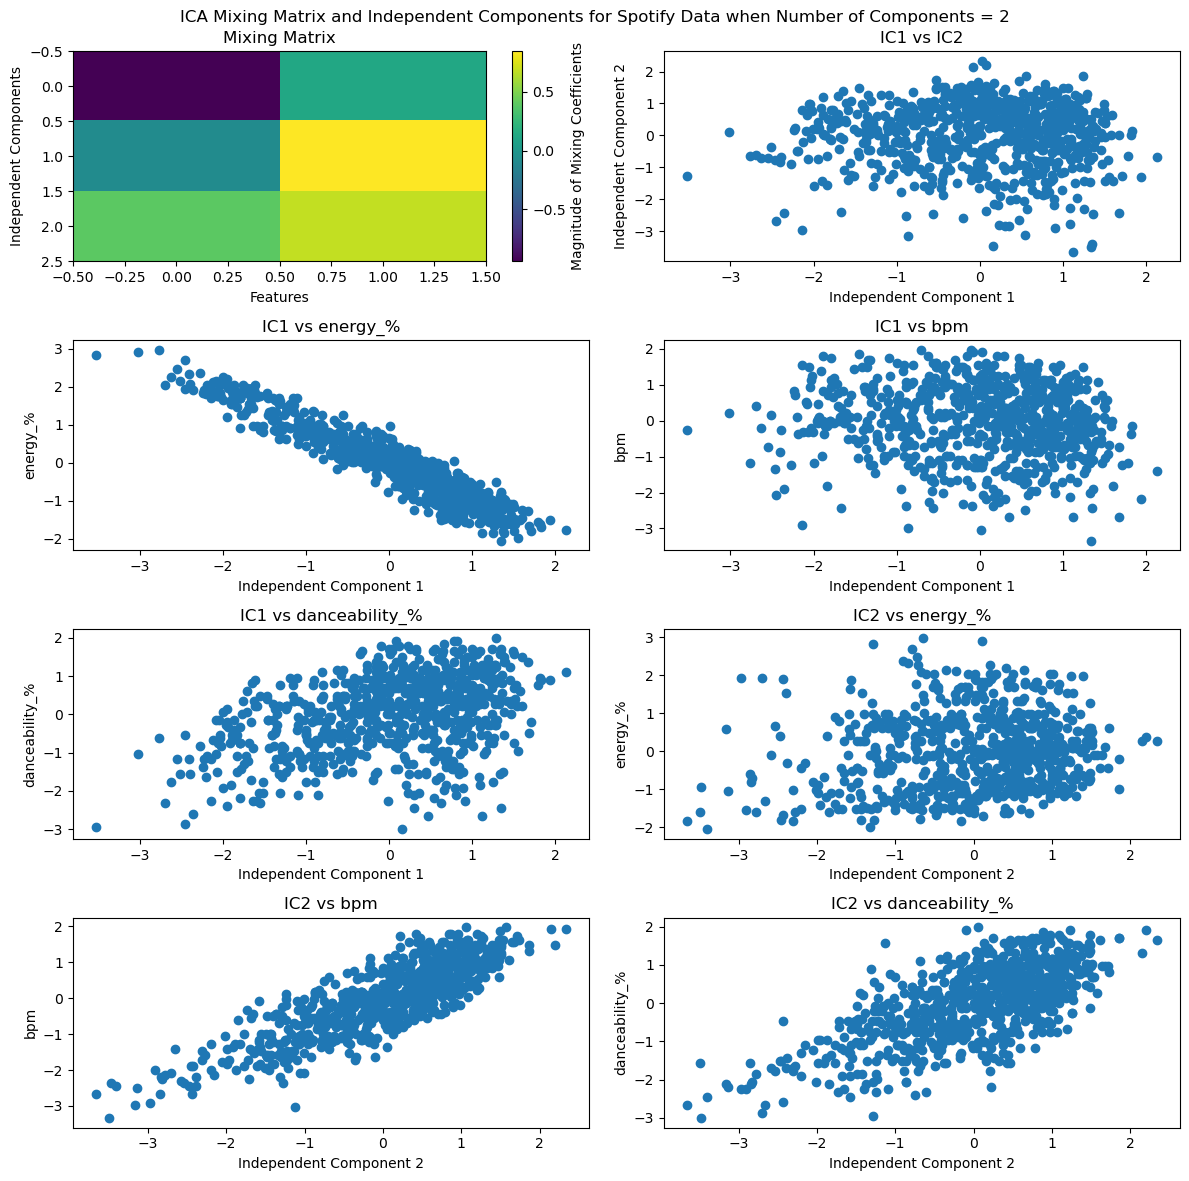

In [23]:
#Create a 4 by 2 grid
fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(4, 2, figure=fig)

#define subsplots
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

#Add mixing matrix as the first plot
cax = ax0.imshow(spotify_ICA.mixing_, cmap='viridis', aspect='auto')
ax0.set_title('Mixing Matrix')
ax0.set_xlabel('Features')
ax0.set_ylabel('Independent Components')

#Add a color bar
cbar = fig.colorbar(cax, ax=ax0)
cbar.set_label('Magnitude of Mixing Coefficients')

#Add the IC1 vs IC2 plots for the second plot

ax1.scatter(independent_components[:, 0], independent_components[:, 1])
ax1.set_xlabel('Independent Component 1')
ax1.set_ylabel('Independent Component 2')
ax1.set_title('IC1 vs IC2')

#Define remaining plots for IC1 and IC2 vs features
features = ['energy_%', 'bpm','danceability_%']
for i, feature in enumerate(features):
    ax = fig.add_subplot(gs[(i+2) //2,(i+2) % 2])
    ax.scatter( independent_components[:, 0],spotify_ICA_train[:, i])
    ax.set_ylabel(feature)
    ax.set_xlabel('Independent Component 1')
    ax.set_title(f'IC1 vs {feature}')

    ax = fig.add_subplot(gs[(i+5)//2, (i+ 5) % 2])
    ax.scatter(independent_components[:, 1],spotify_ICA_train[:, i])
    ax.set_ylabel(feature)
    ax.set_xlabel('Independent Component 2')
    ax.set_title(f'IC2 vs {feature}')


fig.suptitle('ICA Mixing Matrix and Independent Components for Spotify Data when Number of Components = 2') 

plt.tight_layout()

plt.show()

#### focusing on all components

In [24]:
# Load the dataset
file_path = "Input_data/cleaned_spotify_data.csv"
spotify_df = pd.read_csv(file_path)

# Selecting the specified features
selected_features = [
    'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
    'instrumentalness_%', 'liveness_%', 'speechiness_%', 'in_spotify_playlists',
    'in_deezer_playlists', 'in_apple_playlists', 'artist_count', 'released_year'
]

spotify_selected_df = spotify_df[selected_features].dropna()  # Dropping missing values

# Standardizing the features
scaler = StandardScaler()
spotify_scaled_df = scaler.fit_transform(spotify_selected_df)

# Split into training and test sets
spotify_full_ICA_train, spotify_full_ICA_test = train_test_split(spotify_scaled_df, test_size=0.2, random_state=30)

# Applying ICA
n_components = min(spotify_full_ICA_train.shape[0], spotify_full_ICA_train.shape[1])  # Ensuring we do not exceed dimensions
# spotify_full_ica = FastICA(n_components=n_components, random_state=30)
spotify_full_ica = FastICA(random_state=30)

spotify_full_ica_df = spotify_full_ica.fit_transform(spotify_full_ICA_train)

# Convert to DataFrame
spotify_full_ica_df = pd.DataFrame(spotify_full_ica_df, columns=[f'IC{i+1}' for i in range(n_components)])


# Compute kurtosis for each independent component
kurtosis_values = spotify_full_ica_df.apply(stats.kurtosis)



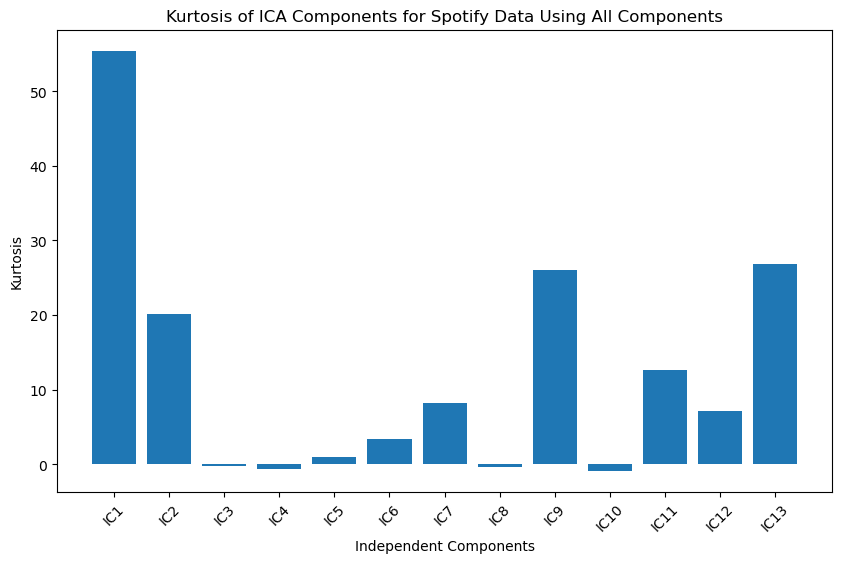

In [25]:

# Plot kurtosis values
plt.figure(figsize=(10, 6))
plt.bar(kurtosis_values.index, kurtosis_values.values)
plt.xlabel("Independent Components")
plt.ylabel("Kurtosis")
plt.title("Kurtosis of ICA Components for Spotify Data Using All Components")
plt.xticks(rotation=45)
plt.show()


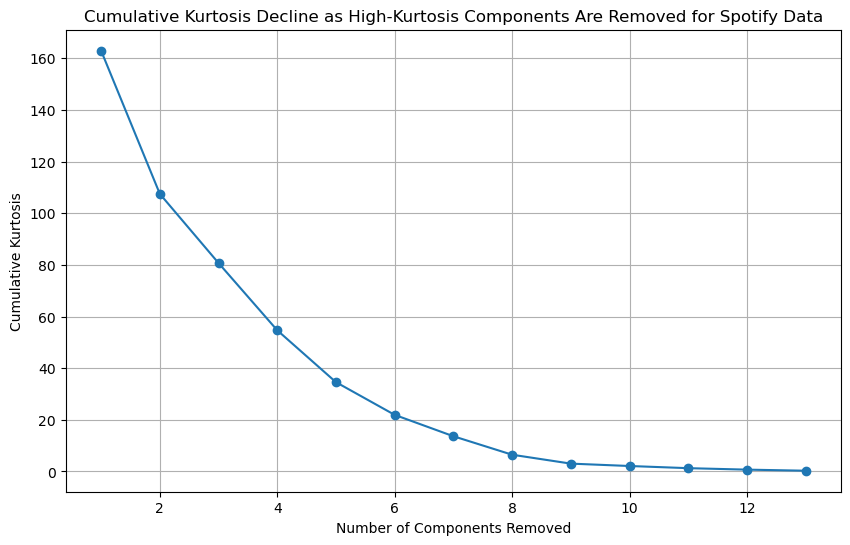

In [26]:
# Compute cumulative kurtosis by removing highest kurtosis components one by one
sorted_kurtosis = kurtosis_values.abs().sort_values(ascending=False)
cumulative_kurtosis = [sorted_kurtosis.sum()]

for i in range(1, len(sorted_kurtosis)):
    cumulative_kurtosis.append(sorted_kurtosis.iloc[i:].sum())

# Create plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_kurtosis) + 1), cumulative_kurtosis, marker="o", linestyle="-")
plt.xlabel("Number of Components Removed")
plt.ylabel("Cumulative Kurtosis")
plt.title("Cumulative Kurtosis Decline as High-Kurtosis Components Are Removed for Spotify Data")
plt.grid(True)
plt.show()

In [27]:
# Compute the sorted indices based on absolute kurtosis values (descending order)
sorted_indices = np.argsort(-np.abs(kurtosis_values))

# Compute cumulative kurtosis in sorted order
cumulative_kurtosis_sorted = [np.abs(kurtosis_values.iloc[sorted_indices]).sum()]
for i in range(1, len(sorted_indices)):
    cumulative_kurtosis_sorted.append(np.abs(kurtosis_values.iloc[sorted_indices[i:]]).sum())




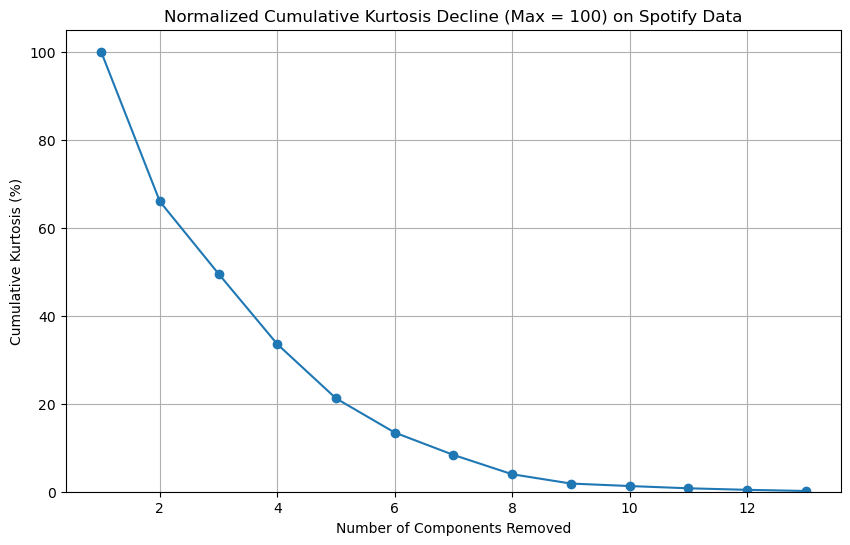

In [28]:
# Normalize cumulative kurtosis so the maximum value is 100
cumulative_kurtosis_normalized = (np.array(cumulative_kurtosis_sorted) / cumulative_kurtosis_sorted[0]) * 100

# Create normalized plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_kurtosis_normalized) + 1), cumulative_kurtosis_normalized, marker="o", linestyle="-")
plt.xlabel("Number of Components Removed")
plt.ylabel("Cumulative Kurtosis (%)")
plt.title("Normalized Cumulative Kurtosis Decline (Max = 100) on Spotify Data")
plt.grid(True)
plt.ylim(0, 105)  # Ensure the y-axis goes from 0 to slightly above 100 for clarity
plt.show()


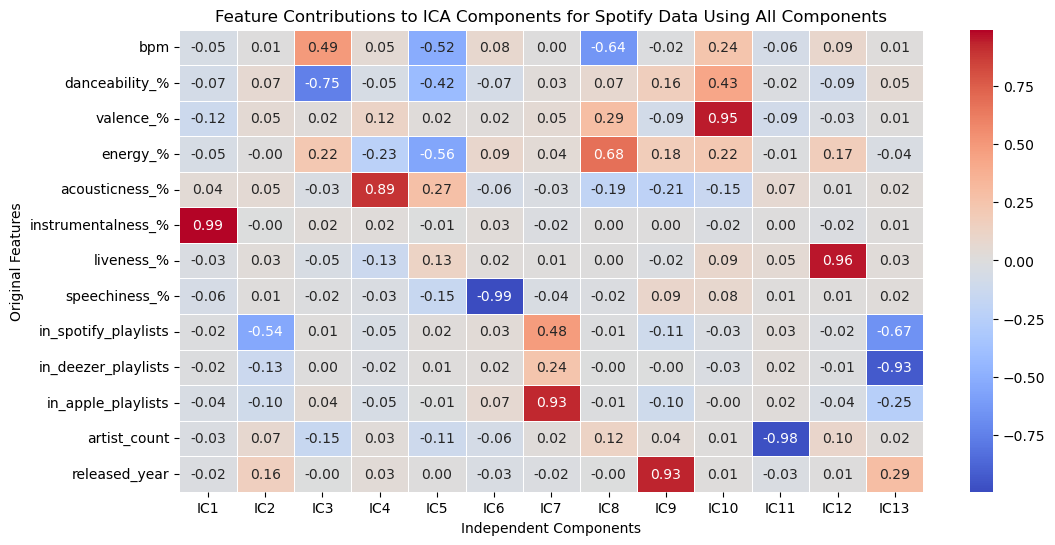

In [29]:


# Extract ICA mixing matrix (A)
mixing_matrix = spotify_full_ica.mixing_

# Create DataFrame for visualization
mixing_df = pd.DataFrame(mixing_matrix, 
                         index=selected_features, 
                         columns=[f'IC{i+1}' for i in range(n_components)])

# # Display the feature contributions to each IC
# tools.display_dataframe_to_user(name="Feature Contributions to ICA Components", dataframe=mixing_df)

# Heatmap for better visualization
plt.figure(figsize=(12, 6))
sns.heatmap(mixing_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Contributions to ICA Components for Spotify Data Using All Components")
plt.xlabel("Independent Components")
plt.ylabel("Original Features")
plt.show()


#### Random Projections

In [30]:
spotify_scaled_df 


spotify_full_RP_train, spotify_full_RP_test = train_test_split(spotify_scaled_df, test_size=0.2, random_state=30)



# Define target dimensions to test
target_dimensions = list(range(2, 14))  # From 2 to 13 dimensions

# Apply Randomized Projections and Compute Reconstruction Error 
results = []

for dim in target_dimensions:
    # Apply Randomized Projections with inverse components computation
    rp = GaussianRandomProjection(n_components=dim, compute_inverse_components=True, random_state=30)
    spotify_rp_transformed = rp.fit_transform(spotify_full_RP_train)

    # Reconstruct the original space using the learned inverse transform
    spotify_rp_reconstructed = rp.inverse_transform(spotify_rp_transformed)

    # Compute reconstruction error (Frobenius norm)
    rp_reconstruction_error = np.linalg.norm(spotify_full_RP_train - spotify_rp_reconstructed, ord='fro')

    # Store results
    results.append([dim, rp_reconstruction_error])

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=["Target Dimensions", "RP Reconstruction Error"])



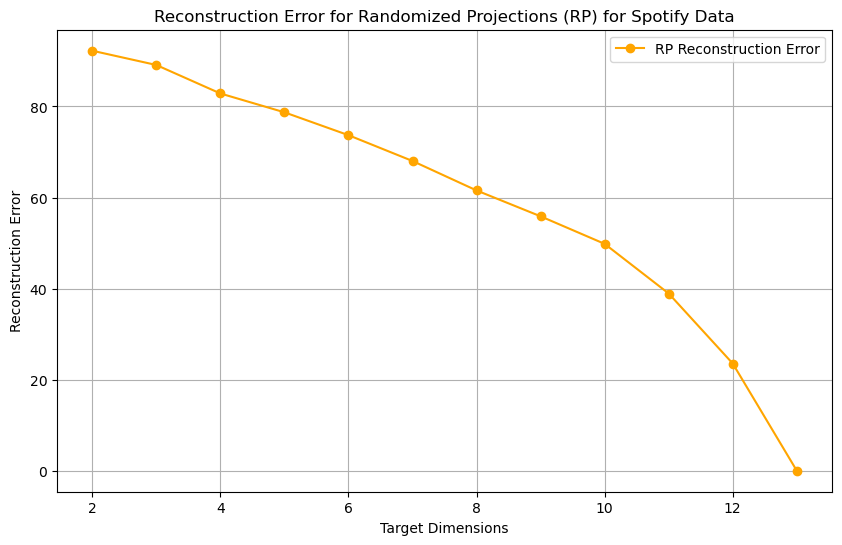

In [31]:


plt.figure(figsize=(10, 6))
plt.plot(target_dimensions, results_df["RP Reconstruction Error"], marker='o', linestyle='-', color='orange', label="RP Reconstruction Error")
plt.xlabel("Target Dimensions")
plt.ylabel("Reconstruction Error")
plt.title("Reconstruction Error for Randomized Projections (RP) for Spotify Data")
plt.grid()
plt.legend()
plt.show()

### Apply clustering

In [32]:
def evaluate_kmeans_clustering(X, k_range=range(2, 50), random_state=30, n_init=15):
    """
    Evaluates KMeans clustering using Elbow method (inertia),
    Silhouette Score, and Davies-Bouldin Score.

    Parameters:
    - X (DataFrame or ndarray): Feature matrix.
    - k_range (iterable): Range of k (number of clusters) to evaluate.
    - random_state (int): Random state for reproducibility.
    - n_init (int): Number of initializations for KMeans.

    Returns:
    - results (dict): Dictionary containing inertia, silhouette, and DB scores for each k.
    """
    inertia_scores = []
    silhouette_scores = []
    db_scores = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=random_state, n_init=n_init)
        kmeans.fit(X)
        labels = kmeans.labels_

        inertia_scores.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, labels))
        db_scores.append(davies_bouldin_score(X, labels))

    return {
        "k_values": list(k_range),
        "inertia": inertia_scores,
        "silhouette": silhouette_scores,
        "davies_bouldin": db_scores
    }


In [33]:

def plot_kmeans_scores(
    k_values,
    inertia,
    silhouette,
    db_scores,
    title="KMeans Results for CPA Dataset (15 ICA Dimensions)"
):
    """
    Plots KMeans evaluation metrics: Inertia (Elbow Method),
    Silhouette Score, and Davies-Bouldin Score.

    Parameters:
    - k_values (list): List of k (number of clusters).
    - inertia (list): Inertia values from KMeans.
    - silhouette (list): Silhouette scores from KMeans.
    - db_scores (list): Davies-Bouldin scores from KMeans.
    - title (str): Title for the entire figure.
    """
    fig, axs = plt.subplots(1, 3, figsize=(25, 8))
    fig.suptitle(title, fontsize=18)

    # Elbow Method (Inertia)
    axs[0].plot(k_values, inertia, marker='o')
    axs[0].set_xlabel('Number of Clusters', fontsize=16)
    axs[0].set_ylabel('Inertia', fontsize=16)
    axs[0].set_title('Elbow Method', fontsize=16)
    axs[0].set_xticks(range(0, max(k_values)+1, 5))
    axs[0].grid()
    axs[0].tick_params(axis='both', labelsize=16)

    # Silhouette Score
    axs[1].plot(k_values, silhouette, marker='o', color='red')
    axs[1].set_xlabel('Number of Clusters', fontsize=16)
    axs[1].set_title('Silhouette Score', fontsize=16)
    axs[1].set_xticks(range(0, max(k_values)+1, 5))
    axs[1].grid()
    axs[1].tick_params(axis='both', labelsize=16)

    # Davies-Bouldin Score
    axs[2].plot(k_values, db_scores, marker='o', linestyle='-')
    axs[2].set_xlabel('Number of Clusters', fontsize=16)
    axs[2].set_title('Davies Bouldin Score', fontsize=16)
    axs[2].set_xticks(range(0, max(k_values)+1, 5))
    axs[2].grid()
    axs[2].tick_params(axis='both', labelsize=16)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [34]:


def evaluate_gmm_clustering(X, k_range=range(2, 50), random_state=30):
    """
    Evaluates Gaussian Mixture Model clustering using BIC, AIC, log-likelihood,
    Silhouette Score, and Davies-Bouldin Score.

    Parameters:
    - X (DataFrame or ndarray): Feature matrix.
    - k_range (iterable): Range of k (number of clusters) to evaluate.
    - random_state (int): Random state for reproducibility.

    Returns:
    - results (dict): Dictionary containing BIC, AIC, log-likelihood, Silhouette,
                      and Davies-Bouldin scores for each k.
    """
    bic_scores = []
    aic_scores = []
    log_likelihoods = []
    silhouette_scores = []
    db_scores = []

    for k in k_range:
        gmm = GaussianMixture(n_components=k, random_state=random_state)
        gmm.fit(X)

        bic_scores.append(gmm.bic(X))
        aic_scores.append(gmm.aic(X))
        log_likelihoods.append(gmm.score(X))

        labels = gmm.predict(X)
        silhouette_scores.append(silhouette_score(X, labels))
        db_scores.append(davies_bouldin_score(X, labels))

    return {
        "k_values": list(k_range),
        "bic": bic_scores,
        "aic": aic_scores,
        "log_likelihood": log_likelihoods,
        "silhouette": silhouette_scores,
        "davies_bouldin": db_scores
    }


In [35]:

def plot_gmm_scores(
    k_values,
    bic_scores,
    aic_scores,
    log_likelihoods,
    silhouette_scores,
    db_scores,
    title_prefix="GMM on CPA ICA 15 Dimensions"
):
    """
    Plots GMM evaluation metrics: BIC, AIC, Log-Likelihood, Silhouette Score,
    and Davies-Bouldin Score in a multi-panel figure.

    Parameters:
    - k_values (list): List of k (number of clusters).
    - bic_scores (list): List of BIC scores.
    - aic_scores (list): List of AIC scores.
    - log_likelihoods (list): List of log-likelihood scores.
    - silhouette_scores (list): List of silhouette scores.
    - db_scores (list): List of Davies-Bouldin scores.
    - title_prefix (str): Title prefix for the overall figure.
    """
    plt.figure(figsize=(15, 9))
    plt.suptitle(f"Scores for {title_prefix}", fontsize=16)

    # BIC
    plt.subplot(2, 3, 1)
    plt.plot(k_values, bic_scores, marker='o', color='blue')
    plt.xlabel('Number of Clusters')
    plt.title('BIC Score', fontsize=14)
    plt.grid(True)

    # AIC
    plt.subplot(2, 3, 2)
    plt.plot(k_values, aic_scores, marker='o', color='red')
    plt.xlabel('Number of Clusters')
    plt.title('AIC Score', fontsize=14)
    plt.grid(True)

    # Log-Likelihood
    plt.subplot(2, 3, 3)
    plt.plot(k_values, log_likelihoods, marker='o', color='green')
    plt.xlabel('Number of Clusters')
    plt.title('Log-Likelihood', fontsize=14)
    plt.grid(True)

    # Silhouette Score
    plt.subplot(2, 3, 4)
    plt.plot(k_values, silhouette_scores, marker='o', color='blue')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score')
    plt.xticks(range(0, max(k_values)+1, 5))
    plt.grid(True)

    # Davies-Bouldin Score
    plt.subplot(2, 3, 5)
    plt.plot(k_values, db_scores, marker='o', linestyle='-')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Davies-Bouldin Score")
    plt.title("Davies-Bouldin Score")
    plt.xticks(range(0, max(k_values)+1, 5))
    plt.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


#### Apply Clustering to PCA

In [36]:
### Apply clustering to the feature reduced PCA model. We will also only be looking at 9 components for the PCA model

# Split the reduced dataset into training and test sets
spotify_reduced_train, spotify_reduced_test = train_test_split(spotify_reduced_scaled, test_size=0.2, random_state=30)

# Apply PCA on reduced dataset
pca_reduced = PCA(n_components=9)
spotify_pca_reduced_transformed = pca_reduced.fit_transform(spotify_reduced_train)

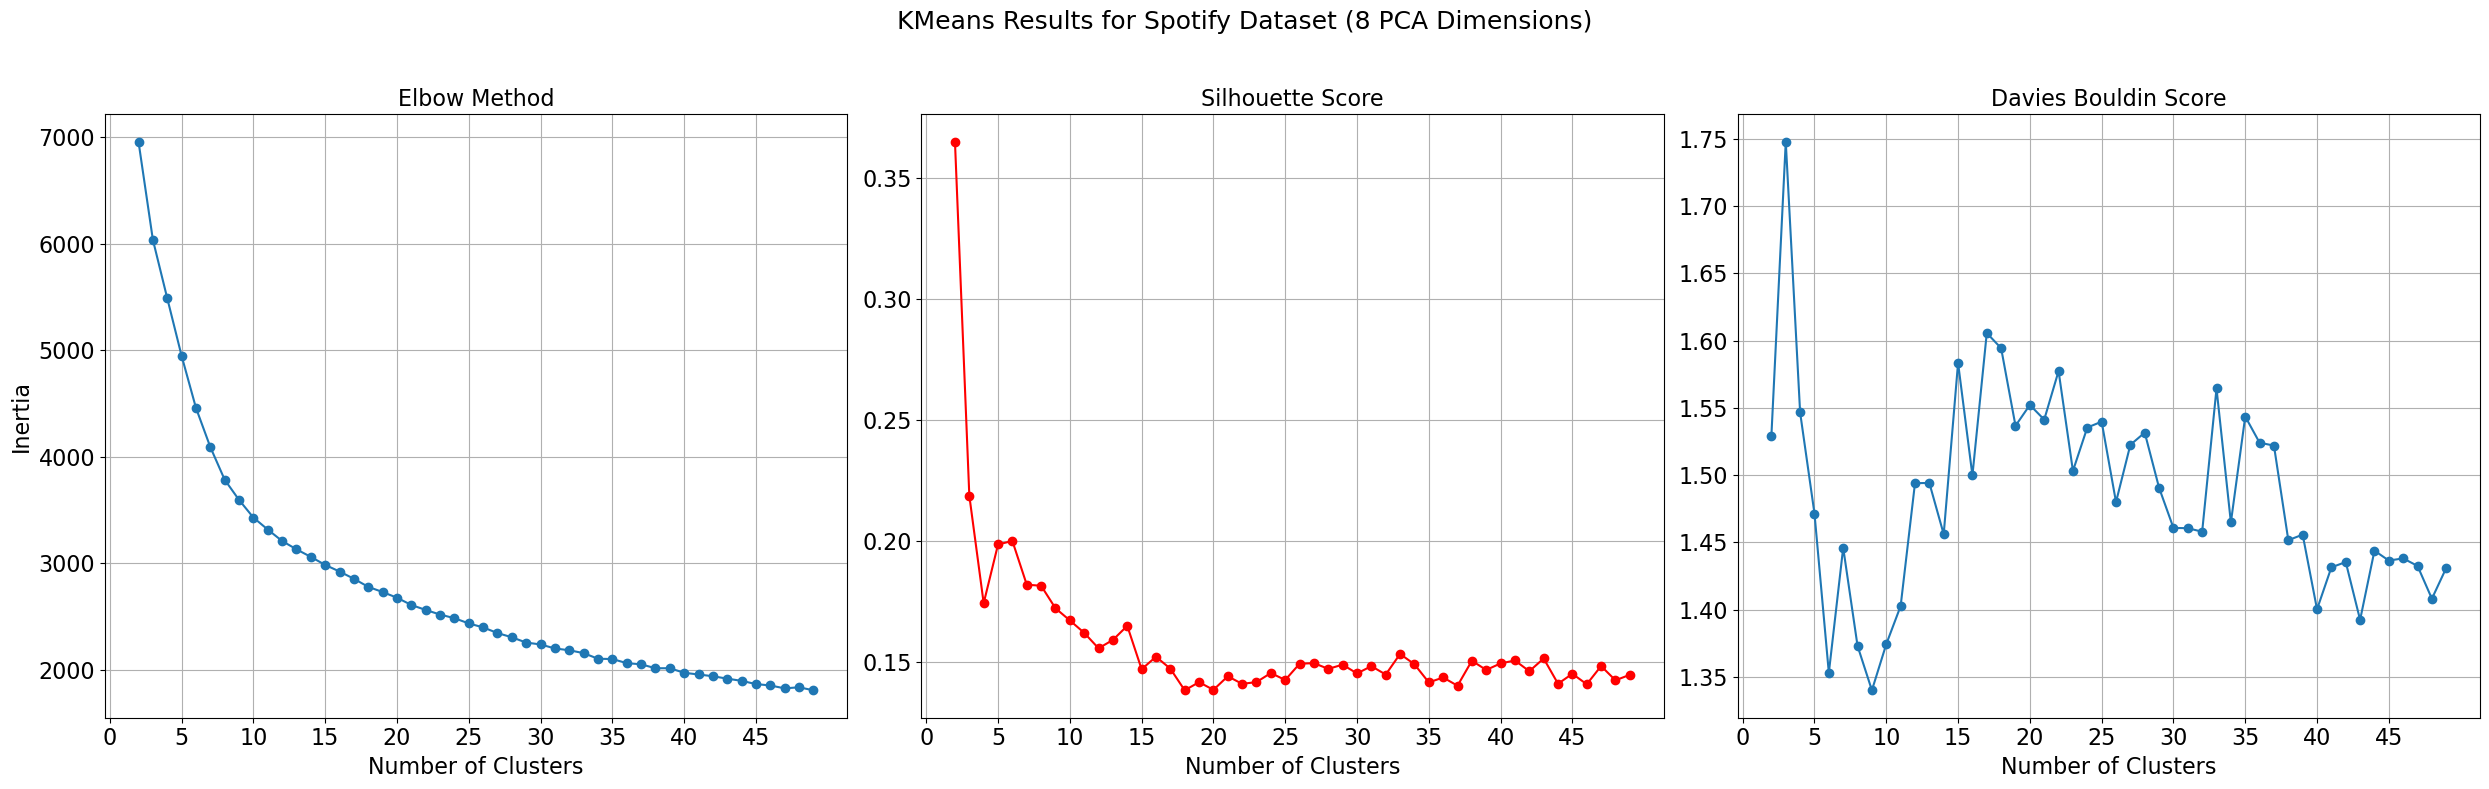

In [37]:
spotify_pca_kmeans_results = evaluate_kmeans_clustering(spotify_pca_reduced_transformed)

plot_kmeans_scores(
    k_values=spotify_pca_kmeans_results["k_values"],
    inertia=spotify_pca_kmeans_results["inertia"],
    silhouette=spotify_pca_kmeans_results["silhouette"],
    db_scores=spotify_pca_kmeans_results["davies_bouldin"],
    title="KMeans Results for Spotify Dataset (8 PCA Dimensions)"
)

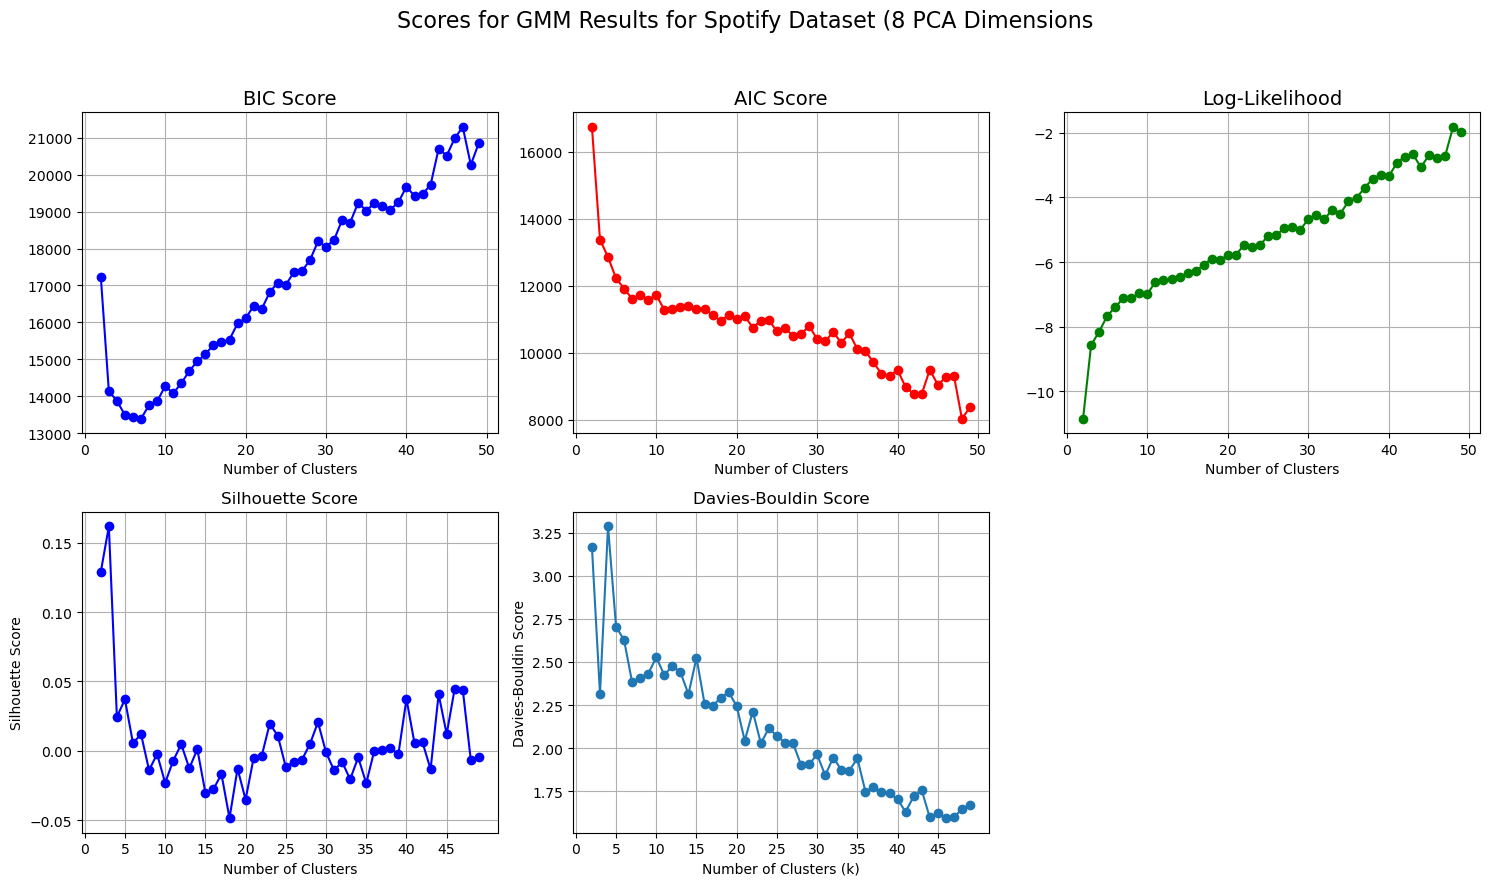

In [38]:
spotify_pca_gmm_results = evaluate_gmm_clustering(spotify_pca_reduced_transformed)

plot_gmm_scores(
    k_values=spotify_pca_gmm_results["k_values"],
    bic_scores=spotify_pca_gmm_results["bic"],
    aic_scores=spotify_pca_gmm_results["aic"],
    log_likelihoods=spotify_pca_gmm_results["log_likelihood"],
    silhouette_scores=spotify_pca_gmm_results["silhouette"],
    db_scores=spotify_pca_gmm_results["davies_bouldin"],
    title_prefix="GMM Results for Spotify Dataset (8 PCA Dimensions"
)

## Apply Neural Net Spotify Dataset

In [39]:
import time

from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, learning_curve, LearningCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, log_loss, RocCurveDisplay
)


#### Using No Form of Dimension Reduction

In [69]:
# Drop specified columns
drop_cols = ['track_name', 'artist_name', 'key', 'mode', 'streams','artist_count']
spotify_base_nn_data = spotify_data.drop(columns=[col for col in drop_cols if col in spotify_data.columns])


# Select relevant features for classification
# features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 
#             'instrumentalness_%', 'liveness_%', 'speechiness_%', 'in_spotify_playlists', 
#             'in_spotify_charts', 'in_apple_playlists']

# Separate features and target
base_X = spotify_base_nn_data.drop(columns=['popularity'])
# base_X = spotify_base_nn_data[features]
base_y = spotify_base_nn_data['popularity']


# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(base_X)

In [70]:
##training split
X_base_train, X_base_test, y_base_train, y_base_test = train_test_split(X_scaled, base_y, test_size=0.2, random_state=30)

In [71]:
# Define model, the same definition as from assignment 1
base_nn = MLPClassifier(hidden_layer_sizes=(100, 20), activation='relu', max_iter=1000, random_state=30)

#define cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=30)

In [72]:
base_train_size, base_train_score, base_valid_score, \
            base_fit_times, base_score_times = learning_curve(estimator=base_nn,
                                                      X=X_base_train,
                                                      y=y_base_train,
                                                      random_state=30,
                                                      train_sizes=np.linspace(.001,1,15),
                                                      scoring = 'accuracy',
                                                      cv=cv,
                                                      n_jobs=-1,
                                                      return_times=True)

In [ ]:
print(base_fit_times)

print(base_score_times)

In [73]:
start = time.time()
base_nn.fit(X_base_train, y_base_train)
end = time.time()

elapsed_time = end - start
print(f"⏱️ Wall Clock Time: {elapsed_time:.2f} seconds")


⏱️ Wall Clock Time: 1.29 seconds


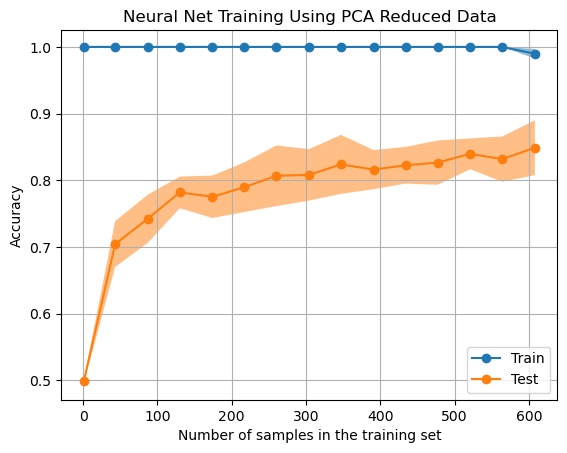

In [74]:
display = LearningCurveDisplay(train_sizes=base_train_size,
                               train_scores=base_train_score,
                               test_scores=base_valid_score,
                            score_name="Accuracy")

param = { "line_kw" : {"marker":"o"}}
display.plot(**param)

# plt.ylim(0.75,1)
plt.title("Neural Net Training Using PCA Reduced Data")
plt.grid()

In [75]:
f1_base_train_size, f1_base_train_score, f1_base_valid_score, \
            f1_base_fit_times, f1_base_score_times = learning_curve(estimator=base_nn,
                                                      X=X_base_train,
                                                      y=y_base_train,
                                                      random_state=30,
                                                      train_sizes=np.linspace(.001,1,15),
                                                      scoring = 'f1',
                                                      cv=5,
                                                      n_jobs=-1,
                                                      return_times=True)


Text(0.5, 1.0, 'Base Neural Net from Assignment 1 (F1 Score)')

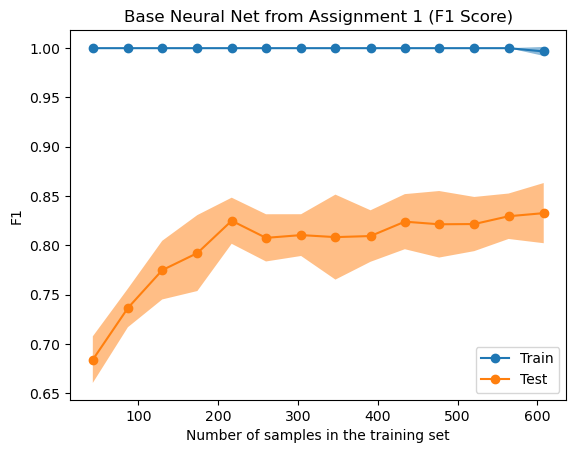

In [76]:
display = LearningCurveDisplay(train_sizes=f1_base_train_size,
                               train_scores=f1_base_train_score,
                               test_scores=f1_base_valid_score,
                            score_name="F1")

param = { "line_kw" : {"marker":"o"}}
display.plot(**param)
plt.title("Base Neural Net from Assignment 1 (F1 Score)")

Text(0.5, 0, 'Training Iteration')

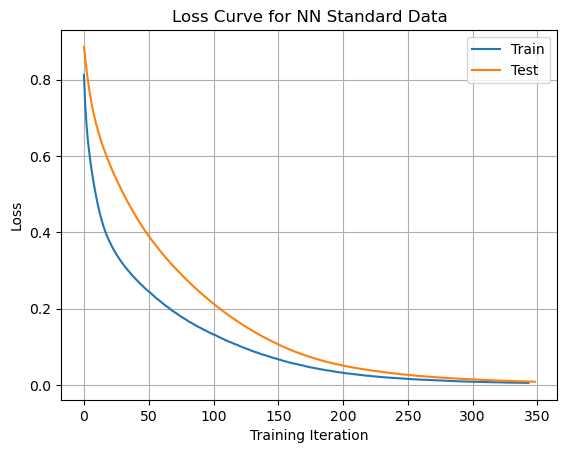

In [77]:
base_nn.fit(X_base_train, y_base_train)
train_fitness_curve_df = pd.DataFrame(base_nn.loss_curve_)

base_nn.fit(X_base_test, y_base_test)
test_fitness_curve_df = pd.DataFrame(base_nn.loss_curve_)

# back_prop_fitness_curve_df.to_csv('loss_curve_backprop.csv')
# plt.plot(np.arange(len(cpa_nn.fitness_curve)),cpa_nn.fitness_curve[:,0])
# plt.plot(base_nn.loss_curve_)
plt.plot(train_fitness_curve_df, label='Train')
plt.plot(test_fitness_curve_df, label='Test')
plt.grid(True)
plt.legend()
plt.title("Loss Curve for NN Standard Data")
plt.ylabel('Loss')
plt.xlabel('Training Iteration')

In [118]:


def train_and_score_nn(X, y, random_state=30):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Create model and CV strategy
    model = MLPClassifier(hidden_layer_sizes=(100, 20), activation='relu', max_iter=1000, random_state=random_state)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

    results = {}

    # Evaluate all desired metrics
    # metrics = ["accuracy", "f1", "precision", "roc_auc"]
    metrics = ["accuracy", "f1"]
    for scoring in metrics:
        train_sizes, train_scores, valid_scores, *_ = learning_curve(
            estimator=model,
            X=X_train,
            y=y_train,
            train_sizes=np.linspace(0.001, 1.0, 15),
            scoring=scoring,
            cv=cv,
            n_jobs=-1,
            return_times=True,
            random_state=random_state
        )
        results[f"{scoring}_train_sizes"] = train_sizes
        results[f"{scoring}_train_mean"] = np.mean(train_scores, axis=1)
        results[f"{scoring}_train_std"] = np.std(train_scores, axis=1)
        results[f"{scoring}_valid_mean"] = np.mean(valid_scores, axis=1)
        results[f"{scoring}_valid_std"] = np.std(valid_scores, axis=1)

    # Time model training
    start = time.time()
    model.fit(X_train, y_train)
    elapsed_time = time.time() - start
    print(f"⏱️ Wall Clock Time: {elapsed_time:.2f} seconds")
    results["train_time"] = elapsed_time

    # Loss curves
    model.fit(X_train, y_train)
    results["train_loss"] = model.loss_curve_

    model.fit(X_test, y_test)
    results["test_loss"] = model.loss_curve_

    return results


In [131]:
def display_nn_results(results, subplot_titles=None):
    fig, axs = plt.subplots(1, 3, figsize=(20, 8))
    fig.tight_layout(pad=5.0)
    fig.set_figheight(6)
    fig.set_figwidth(13)

    fig.suptitle(subplot_titles, fontsize=16)

    for idx, metric in enumerate(["accuracy", "f1"]):
        sizes = results[f"{metric}_train_sizes"]
        train_mean = results[f"{metric}_train_mean"]
        train_std = results[f"{metric}_train_std"]
        valid_mean = results[f"{metric}_valid_mean"]
        valid_std = results[f"{metric}_valid_std"]

        axs[idx].plot(sizes, train_mean, label='Train', marker='o')
        axs[idx].fill_between(sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)

        axs[idx].plot(sizes, valid_mean, label='Validation', marker='o')
        axs[idx].fill_between(sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2)

        axs[idx].set_title(f"Learning Curve ({metric.capitalize()})")
        axs[idx].set_xlabel("Training Set Size")
        axs[idx].set_ylabel(metric.capitalize())
        axs[idx].grid(True)
        axs[idx].legend()

    # Loss Curve
    fig.suptitle(subplot_titles, fontsize=16)
    axs[2].plot(results["train_loss"], label='Train')
    axs[2].plot(results["test_loss"], label='Test')
    axs[2].set_title("Loss Curve")
    axs[2].set_xlabel("Training Iteration")
    axs[2].set_ylabel("Loss")
    axs[2].grid(True)
    axs[2].legend()

    plt.show()


In [113]:
results = train_and_score_nn(X_scaled, base_y)


⏱️ Wall Clock Time: 2.64 seconds


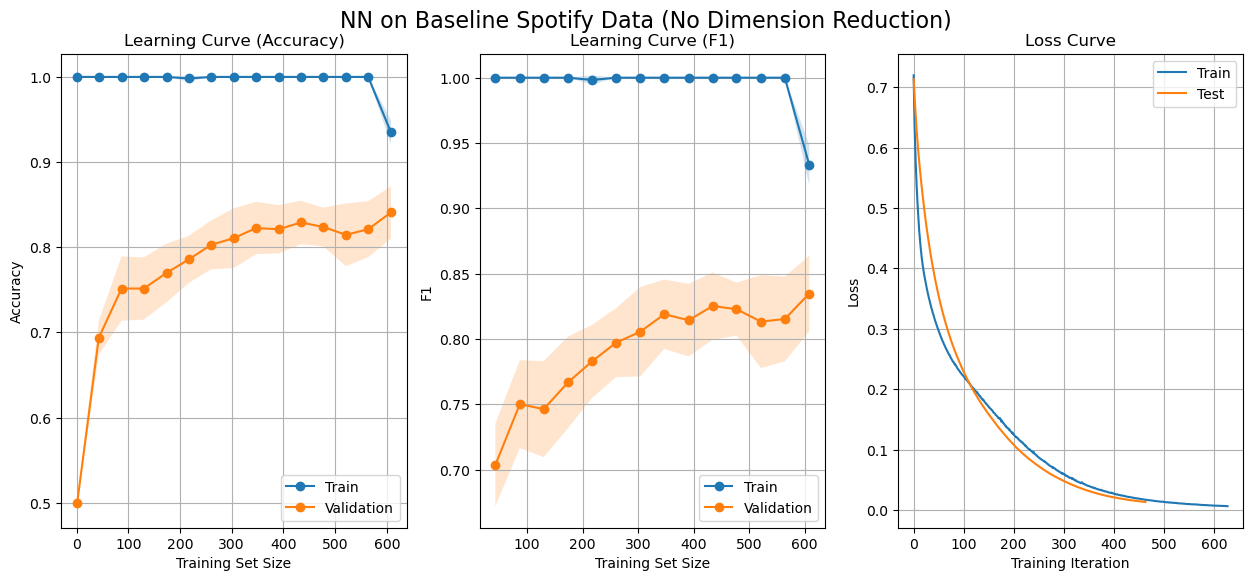

In [132]:

display_nn_results(results, 'NN on Baseline Spotify Data (No Dimension Reduction)')


#### Using PCA first

In [82]:
# We will use the reduced PCA space and the reduced dataset that we discovered 
#we will drop artist count because we say that it      is did not contribue much to PCA in the first main 4 features
spotify_data.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,popularity
0,2,2023,7,14,553,147,141381703.0,43,263,45,...,B,Major,80,89,83,31,0,8,4,0
1,1,2023,3,23,1474,48,133716286.0,48,126,58,...,C#,Major,71,61,74,7,0,10,4,0
2,1,2023,6,30,1397,113,140003974.0,94,207,91,...,F,Major,51,32,53,17,0,31,6,0
3,1,2019,8,23,7858,100,800840817.0,116,207,125,...,A,Major,55,58,72,11,0,11,15,1
4,1,2023,5,18,3133,50,303236322.0,84,133,87,...,A,Minor,65,23,80,14,63,11,6,1


In [83]:
# Drop specified columns
drop_cols = ['track_name', 'artist_name', 'key', 'mode', 'streams','artist_count']
spotify_pca_nn_data = spotify_data.drop(columns=[col for col in drop_cols if col in spotify_data.columns])


features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 
            'instrumentalness_%', 'liveness_%', 'speechiness_%', 'in_spotify_playlists', 
            'in_spotify_charts', 'in_apple_playlists']


In [84]:
# Separate features and target
# X = spotify_pca_nn_data.drop(columns=['popularity'])
X = spotify_pca_nn_data[features]
y = spotify_pca_nn_data['popularity']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [85]:
## We want the first 9 features from our reduced pca calculation
# Apply PCA to retain 95% of variance
pca = PCA(n_components=9, random_state=30)
X_pca = pca.fit_transform(X_scaled)


In [86]:
##training split
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [87]:
# Define model, the same definition as from assignment 1
pca_nn = MLPClassifier(hidden_layer_sizes=(100, 20), activation='relu', max_iter=1000, random_state=30)

#define cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=30)



In [88]:
base_train_size, base_train_score, base_valid_score, \
            base_fit_times, base_score_times = learning_curve(estimator=pca_nn,
                                                      X=X_pca_train,
                                                      y=y_pca_train,
                                                      random_state=30,
                                                      train_sizes=np.linspace(.001,1,15),
                                                      scoring = 'accuracy',
                                                      cv=cv,
                                                      n_jobs=-1,
                                                      return_times=True)

Text(0.5, 1.0, 'Neural Net Training Using PCA Reduced Data')

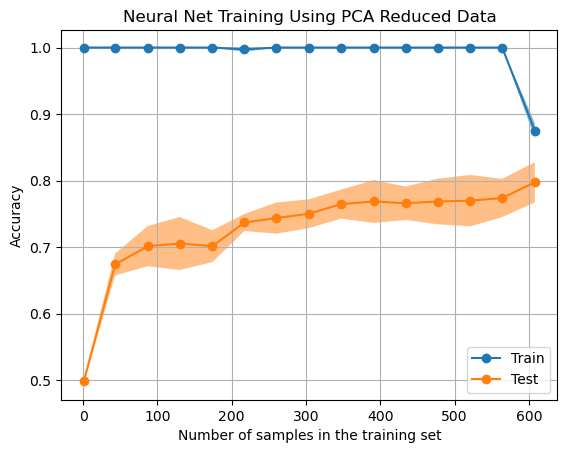

In [89]:
display = LearningCurveDisplay(train_sizes=base_train_size,
                               train_scores=base_train_score,
                               test_scores=base_valid_score,
                            score_name="Accuracy")

param = { "line_kw" : {"marker":"o"}}
display.plot(**param)
plt.grid()

# plt.ylim(0.75,1)
plt.title("Neural Net Training Using PCA Reduced Data")

In [90]:
pca_nn.fit(X_pca_train, y_pca_train)
train_pca_fitness_curve_df = pd.DataFrame(pca_nn.loss_curve_)


pca_nn.fit(X_pca_test, y_pca_test)
test_pca_fitness_curve_df = pd.DataFrame(pca_nn.loss_curve_)


Text(0.5, 0, 'Training Iteration')

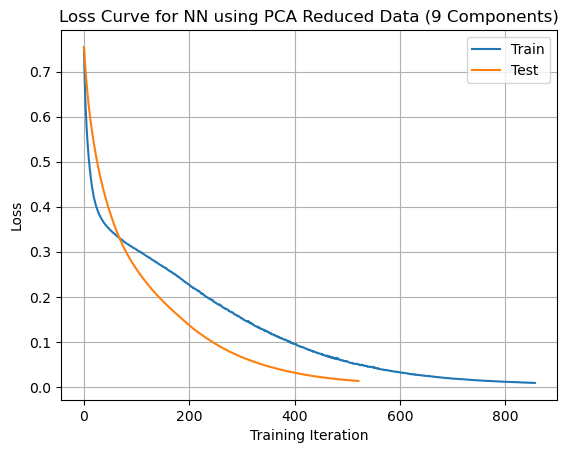

In [ ]:

# # back_prop_fitness_curve_df.to_csv('loss_curve_backprop.csv')
# # plt.plot(np.arange(len(cpa_nn.fitness_curve)),cpa_nn.fitness_curve[:,0])
# plt.plot(train_pca_fitness_curve_df, label='Train')
# plt.plot(test_pca_fitness_curve_df, label='Test')
# plt.grid(True)
# plt.legend()
# plt.title("Loss Curve for NN using PCA Reduced Data (9 Components)")
# plt.ylabel('Loss')
# plt.xlabel('Training Iteration')

In [92]:
start = time.time()
pca_nn.fit(X_pca_train, y_pca_train)
end = time.time()

elapsed_time = end - start
print(f"⏱️ Wall Clock Time: {elapsed_time:.2f} seconds")

⏱️ Wall Clock Time: 3.01 seconds


In [133]:
results = train_and_score_nn(X_pca, y)


⏱️ Wall Clock Time: 4.01 seconds


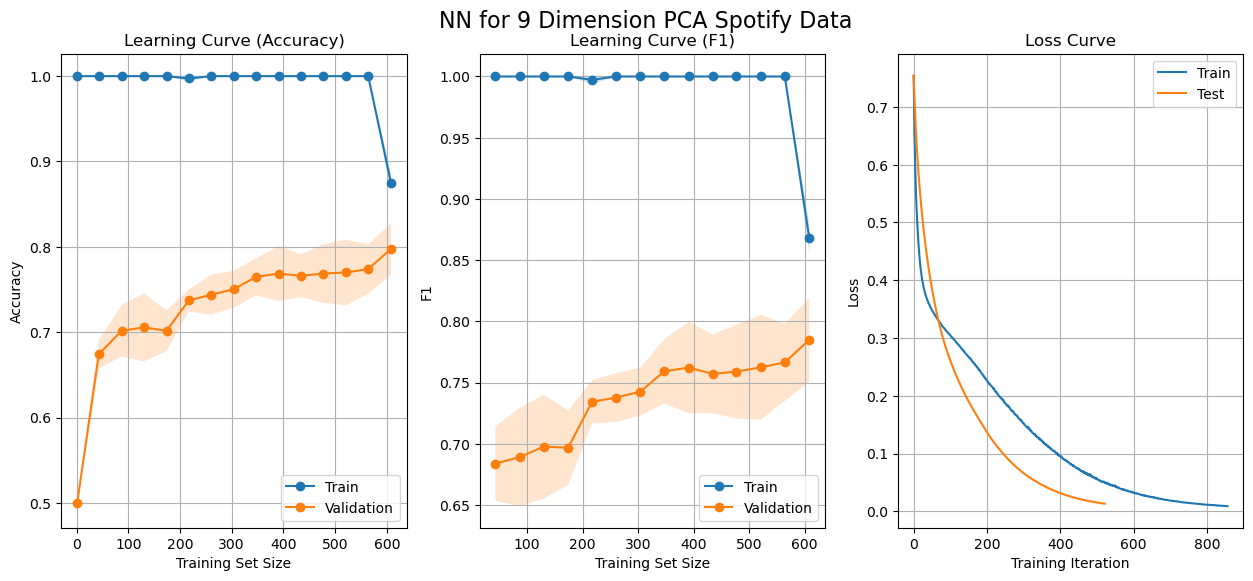

In [134]:
pca_results = results
display_nn_results(pca_results, 'NN for 9 Dimension PCA Spotify Data')


#### ICA NN

In [135]:
## We want the first 9 features from our reduced pca calculation
# Apply ICA to retain 90% of Kurtosis
ica = FastICA(n_components=7, random_state=30)
X_ica = ica.fit_transform(X_scaled)


In [136]:
ica_results = train_and_score_nn(X_ica, y)


⏱️ Wall Clock Time: 3.72 seconds


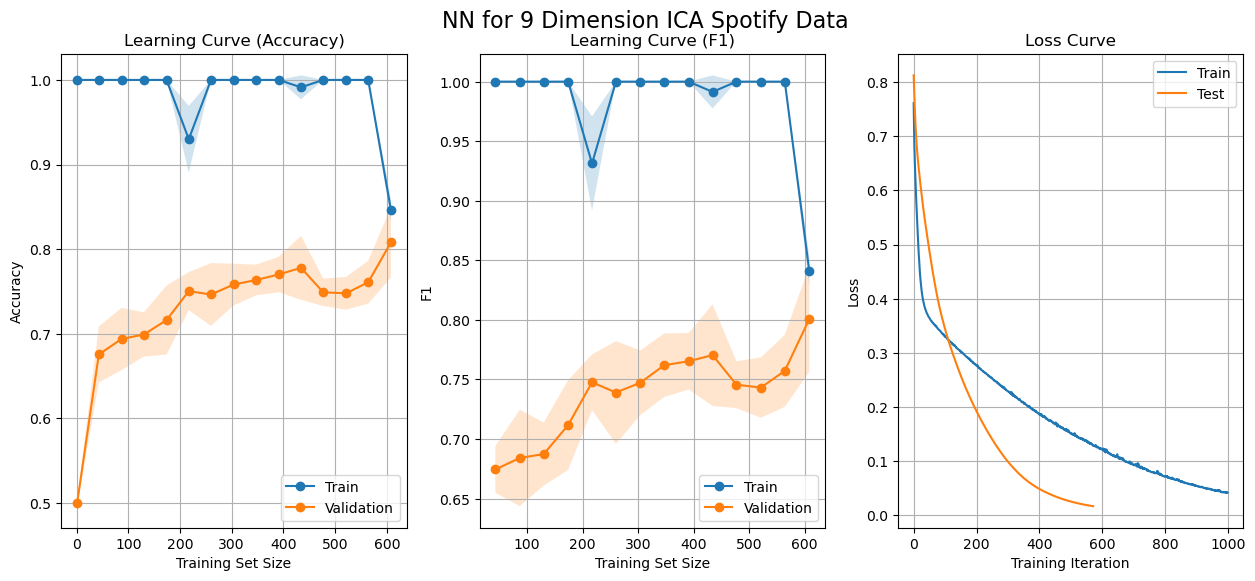

In [137]:
display_nn_results(ica_results, 'NN for 9 Dimension ICA Spotify Data')
